# Amazon Product Reviews

## 1. Business Problem Classifying Topics 

### Objective: 

## Project Objectives:

Dataset Exploration and Data Cleaning:
- Remove null and inconsistent values.
- Check for duplicates in the data.
- Perform text preprocessing, such as removing stopwords, tokenization, and applying stemming or lemmatization.

Topic Modeling:
- Apply Topic Modeling techniques such as **Latent Dirichlet Allocation (LDA)** to identify the main topics in the reviews.
- Test different numbers of topics and evaluate the quality of the identified topics.
- Identify the most representative words for each topic.

Topic Classification:
- Once the topics are identified, classify the reviews into different categories to facilitate search.

Evaluation:
- Assess the coherence of the generated topics using topic coherence metrics.
- Interpret and label the topics meaningfully to improve visualization and search.

Results and Impact:
- Provide a set of categories or topics that help users quickly filter reviews based on discussed themes (product quality, shipping, customer support, etc.).
- Implement the model in a way that it can be applied to new data automatically.

### About Dataset
- **id**: id  
- **asins**: Product code (Amazon Standard Identification Number)  
- **brand**: Brand  
- **categories**: Categories  
- **colors**: Colors  
- **dateAdded**: Date added  
- **dateUpdated**: Date updated  
- **dimension**: Dimension  
- **ean**: European Article Number, international barcode  
- **keys**: Keywords related to the product  
- **manufacturer**: Manufacturer  
- **manufacturerNumber**: Manufacturer's product number  
- **name**: Name of the product  
- **prices**: Prices of the product  
- **reviews.date**: Date the review was posted  
- **reviews.doRecommend**: Whether the reviewer recommends the product or not  
- **reviews.numHelpful**: Number of helpful votes for the review
- **reviews.rating**:
- **reviews.sourceURLs**: 
- **reviews.text**:
- **review.title**:
- **reviews.userCity**:
- **reviews.userProvince**:
- **reviews.username**:
- **sizes**:
- **upc**:
- **weight**:

## 2. Import Libraries and dataset

In [43]:
# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLP
import re #search, matching, or replace the complex string
import string # provide the function relate string 
import nltk 
from nltk.tokenize import word_tokenize  # Tokenize the text into words
from nltk.corpus import stopwords  # Stopwords: words that don't carry significant meaning in NLP context
from nltk.stem import PorterStemmer  # Remove suffixes from words (e.g., running -> run) to get the root fo

### About Libraries

**Libraries for Data Frame**
- **pandas**:  
  Used for data manipulation and analysis. Provides flexible data structures like DataFrame and Series for handling structured data efficiently.  
  Example use case: Reading and processing CSV files.

- **numpy**:  
  A powerful library for numerical computing. It provides support for multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.  
  Example use case: Performing mathematical operations on numerical data.

**Libraries for Visualization**
- **matplotlib**:  
  A foundational library for creating static, animated, and interactive visualizations in Python. It supports a wide range of plots, such as line, bar, scatter, and histogram.  
  Example use case: Creating a simple line chart.

- **seaborn**:  
  Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics. It integrates well with pandas DataFrame.  
  Example use case: Drawing heatmaps or visualizing data distributions.

- **plotly**:  
  A library for creating interactive visualizations. It allows for the creation of highly customizable plots that can be shared online or embedded in dashboards.  
  Example use case: Interactive scatter or line plots.

**Libraries for NLP**
- **re**:  
  A module for working with regular expressions in Python. It is used for string pattern matching, searching, and substitution.  
  Example use case: Removing special characters or extracting specific patterns from text.

- **nltk (Natural Language Toolkit)**:  
  A comprehensive library for Natural Language Processing (NLP). It provides tools for tokenization, stemming, lemmatization, parsing, and more.  
  Example use case: Tokenizing a sentence into words or removing stop words from text.


In [44]:
# Import Dataset
df = pd.read_csv("Amazon Product Reviews.csv")

In [45]:
# Viewing first 5 row
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [46]:
# Viewing 5 lasted row
df.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces
1596,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I ordered this item to replace the one that no...,I am sending all of this crap back to amazon a...,NaN,NaN,DIANE K,NaN,NaN,4 ounces


In [47]:
# data Infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [48]:
## data types
df.dtypes

id                       object
asins                    object
brand                    object
categories               object
colors                   object
dateAdded                object
dateUpdated              object
dimension                object
ean                     float64
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
prices                   object
reviews.date             object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
sizes                   float64
upc                     float64
weight                   object
dtype: object

In [49]:
## data shape
df.shape

(1597, 27)

## 3. Data cleaning

### Check missing value

In [50]:
print("Check mising value for each columns: ")
print(df.isnull().sum())

Check mising value for each columns: 
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


### Check % missing of each columns

In [51]:
print("Percentage of missing value of each columns: ")
per_missing = df.isnull().mean()*100
per_missing = per_missing[per_missing > 0]
per_missing

Percentage of missing value of each columns: 


colors                   51.534126
dimension                64.621165
ean                      43.769568
manufacturer             39.574202
manufacturerNumber       43.519098
reviews.date             23.794615
reviews.doRecommend      66.249217
reviews.numHelpful       43.644333
reviews.rating           26.299311
reviews.title             1.064496
reviews.userCity        100.000000
reviews.userProvince    100.000000
reviews.username          1.064496
sizes                   100.000000
upc                      43.769568
weight                   57.044458
dtype: float64

### Drop columns
- **Drop columns with many missing values**: Remove columns that contain a large number of missing or null values, as they may not provide valuable information for analysis.

In [52]:
df.drop(columns=['colors','dimension','ean','manufacturer','manufacturerNumber','reviews.date','reviews.doRecommend','reviews.numHelpful','reviews.rating','reviews.userCity','reviews.userProvince','sizes','upc','weight'],inplace=True)
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic


## 4. Text Preprocessing

- **Goal**: Apply the VADER model to define the main sentiment of the reviews as negative, positive, or neutral.

=> Process the column `reviews.text`.

In [53]:
## Reviews.text column check
for i in range(5):
    print(df['reviews.text'][i])

I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

In [54]:
# download the necessary resources from nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

## initialize the porter stemmer and load english stopwords
stemmer = PorterStemmer()
##create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function to text preprocessing 

#### Check special chars

In [55]:
#Check special chars
unique_special_chars = set()
for i in range(len(df)):
    temp = df['reviews.text'][i]
    special_chars = re.findall(r'[^\w]',temp)
    unique_special_chars.update(special_chars)
print(unique_special_chars)

{'(', '{', '+', "'", '/', '-', '%', ')', ',', ';', '&', '"', ' ', ':', '?', '$', '.', '…', '!', '*', '�'}


#### Cleaning text by removing URLs, handles, punctuation

In [56]:
def process_text(text):
    if isinstance(text,str):
        ## Convert text to lower
        text = text.lower()

        # Remove URLs 
        text = re.sub(r'https\S+|www\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links
        text = re.sub(r'\[.*?\]\(.*?\)','',text)

        #Remove punctuation and special characters
        text = text.translate(str.maketrans('','',string.punctuation))

        return text
    else: 
        return text
    
## Function to tokenize 
def tokenize_text(text):
    if isinstance(text,str):
        return word_tokenize(text)
    else:
        return text
    
## Function to remove stopwords from tokenized
def remove_stopwords(tokens):
    if isinstance(tokens,list):
        list_word = [word for word in tokens if word not in stop_words]
        return list_word
    else:
        return list_word
    
# Function to apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

In [57]:
df['Cleaned_Review'] = df['reviews.text'].apply(process_text)
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

In [58]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti..."


## 5. Sentiment Analysis with Vader

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a sentiment analysis model specifically developed to handle short texts,


such as tweets, social media comments, or product reviews. This makes VADER a suitable choice for this case.


In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(review):
    return analyzer.polarity_scores(review)

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [60]:
df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment'] = df['compound'].apply(classify_sentiment)

In [61]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,keys,name,prices,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review,vader_scores,compound,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between...","[i, initi, had, troubl, decid, between, the, p...","[initially, trouble, deciding, paperwhite, voy...","{'neg': 0.008, 'neu': 0.82, 'pos': 0.171, 'com...",0.9879,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little...","[allow, me, to, prefac, thi, with, a, littl, h...","[allow, preface, little, history, casual, read...","{'neg': 0.033, 'neu': 0.824, 'pos': 0.143, 'co...",0.9881,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea...","[i, am, enjoy, it, so, far, great, for, read, ...","[enjoying, far, great, reading, original, fire...","{'neg': 0.173, 'neu': 0.613, 'pos': 0.213, 'co...",0.4364,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ...","[i, bought, one, of, the, first, paperwhit, an...","[bought, one, first, paperwhites, pleased, con...","{'neg': 0.028, 'neu': 0.873, 'pos': 0.099, 'co...",0.9746,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,kindlepaperwhite/b00qjdu3ky,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor...","[i, have, to, say, upfront, i, dont, like, cor...","[say, upfront, dont, like, coroporate, hermeti...","{'neg': 0.03, 'neu': 0.731, 'pos': 0.239, 'com...",0.9980,Positive


## 6. EDA

### Distribution of Customer Reviews (Positive, Neutral, Negative)

Text(0, 0.5, 'Count')

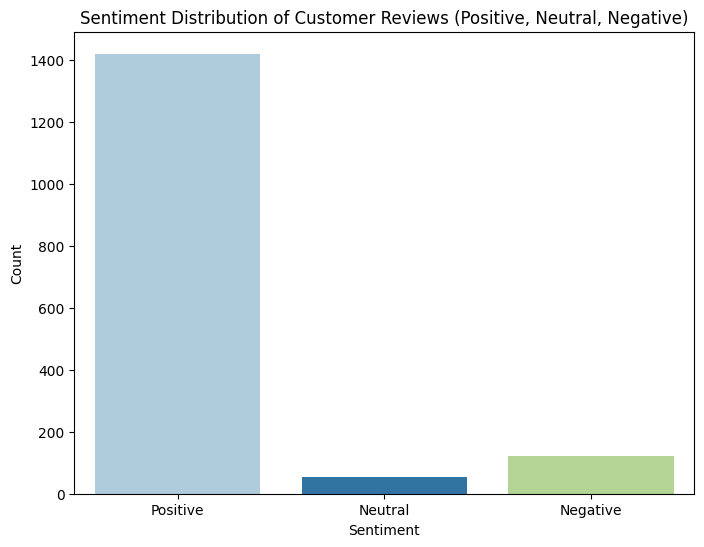

In [62]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Paired')
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

Conlusion 
- The distribution of customer sentiment data is highly imbalanced.
- The **Positive** class overwhelmingly dominates the dataset.
- The **Neutral** and **Negative** classes have significantly fewer samples, especially the Neutral class which is extremely underrepresented.

### Word cloud of Reviews Customer analysis 

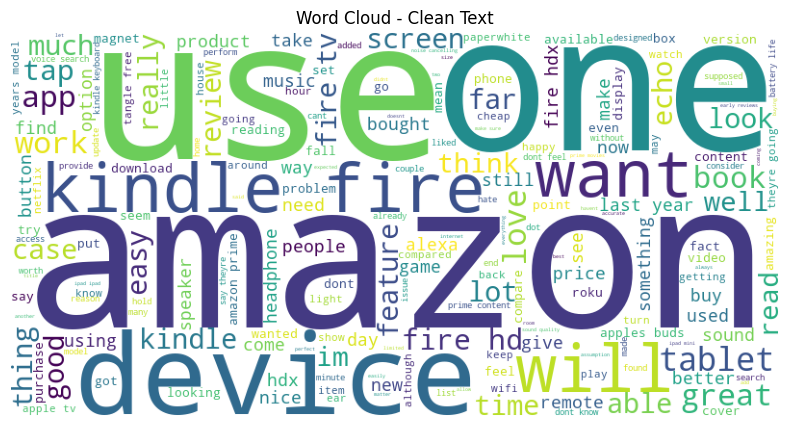

In [63]:
from wordcloud import WordCloud
reviews = ' '.join(df['Cleaned_Review'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

### Positive word cloud

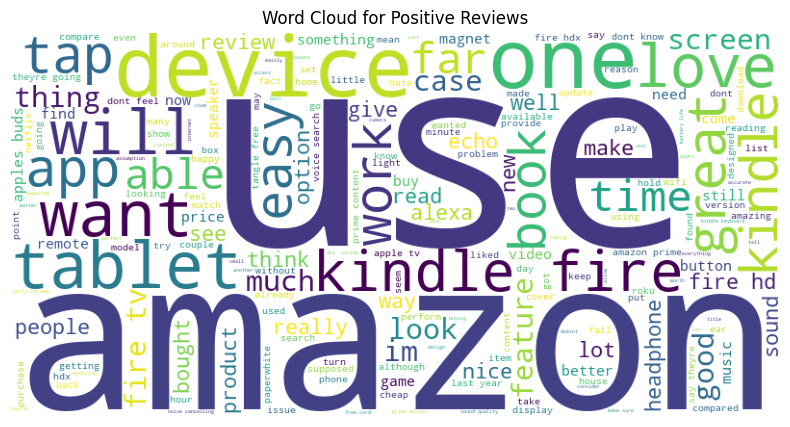

In [64]:
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

### Negative word cloud

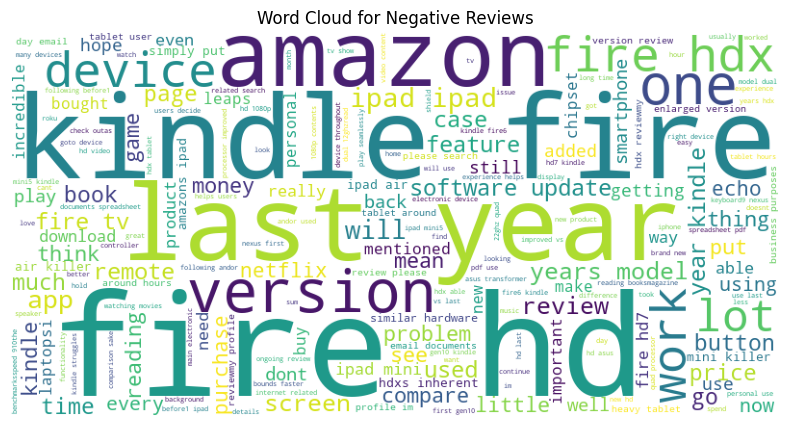

In [65]:
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

### Neutral word cloud

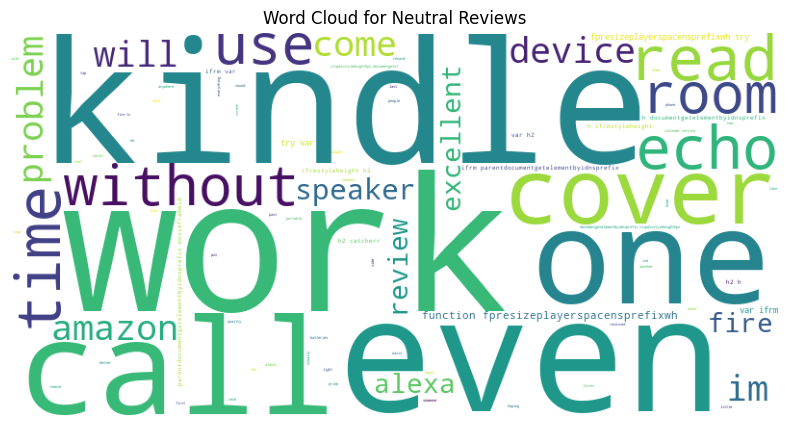

In [66]:
neutral_reviews = " ".join(df[df['sentiment'] == 'Neutral']['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud for Neutral Reviews")
plt.show()

### Top most common tokens in Reviews


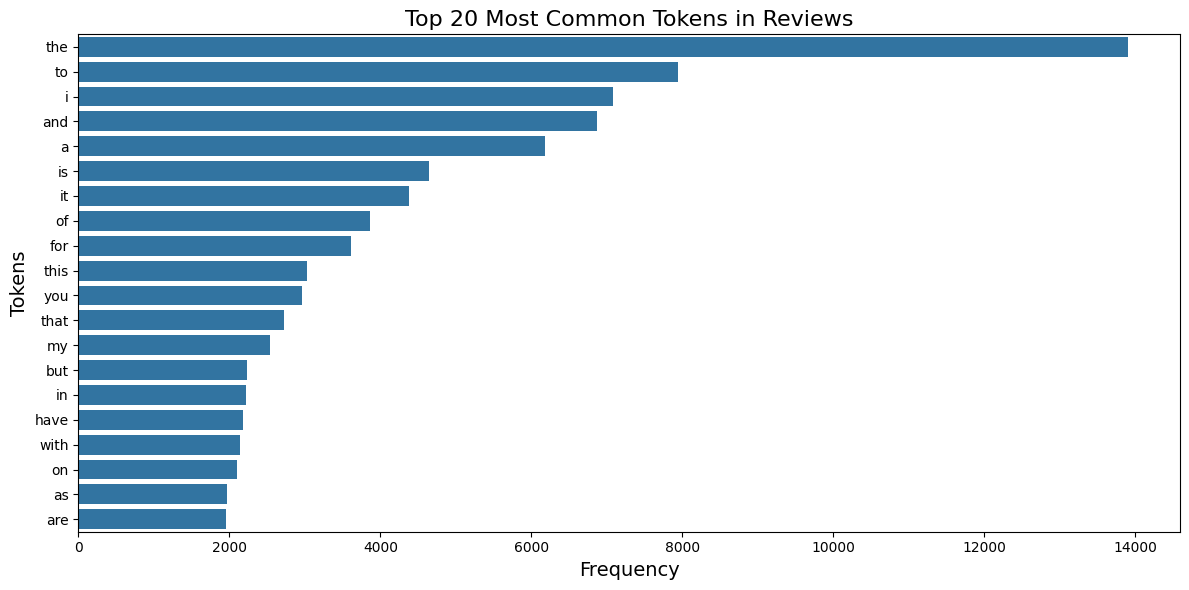

In [67]:
from collections import Counter
all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]
token_counts = Counter(all_tokens)
common_tokens = token_counts.most_common(20)  # Limiting to top 20
tokens, frequencies = zip(*common_tokens)


plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens)) 
plt.title('Top 20 Most Common Tokens in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tokens', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

### Top most common tokens in Positive Reviews

In [68]:
def plot_most_common_words(common_words, sentiment):
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

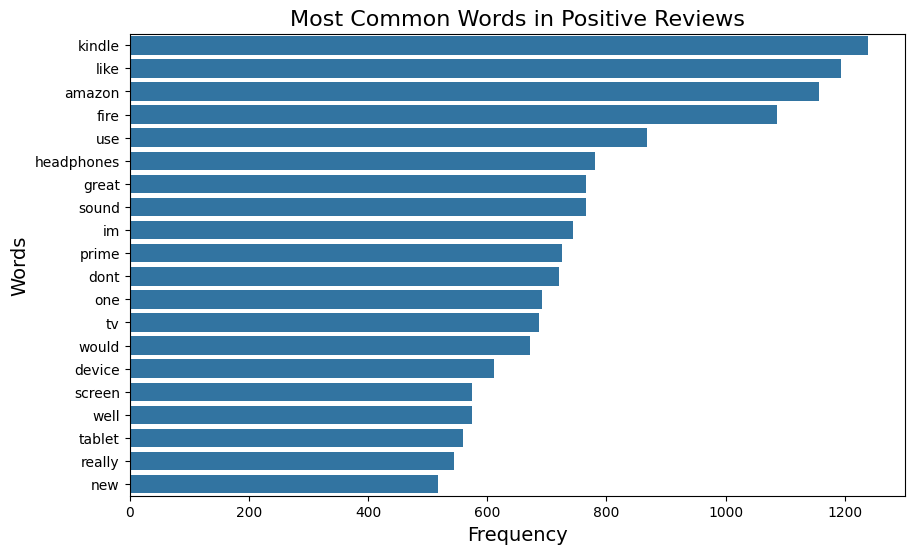

In [69]:
positive_reviews = df[df['sentiment'] == 'Positive']['No_Stopwords_Review']
positive_words_list = [word for review in positive_reviews for word in review]
positive_words = Counter(positive_words_list).most_common(20)
plot_most_common_words(positive_words, 'Positive')

### Top most common tokens in Negative Reviews

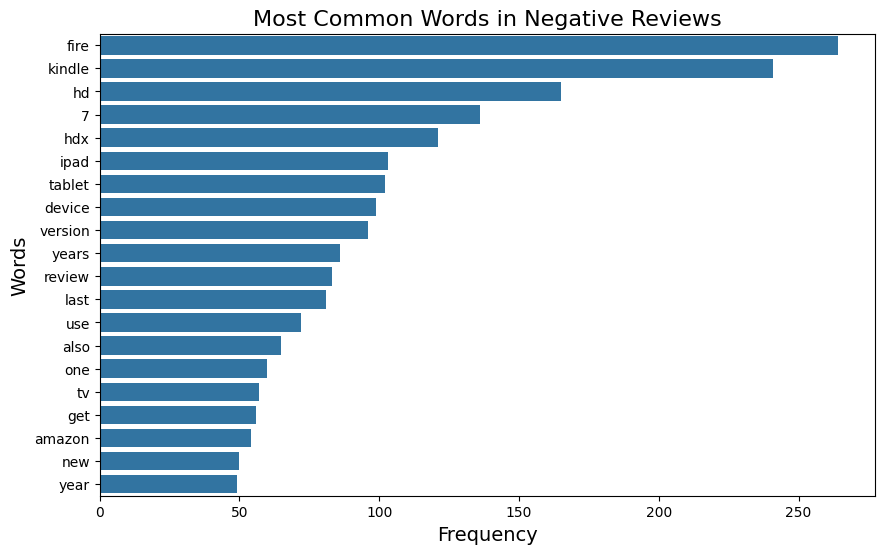

In [70]:
negative_reviews = df[df['sentiment'] == 'Negative']['No_Stopwords_Review']
negative_words_list = [word for review in negative_reviews for word in review]
negative_words = Counter(negative_words_list).most_common(20)
plot_most_common_words(negative_words, 'Negative')

### Top most common tokens in Neutral Reviews

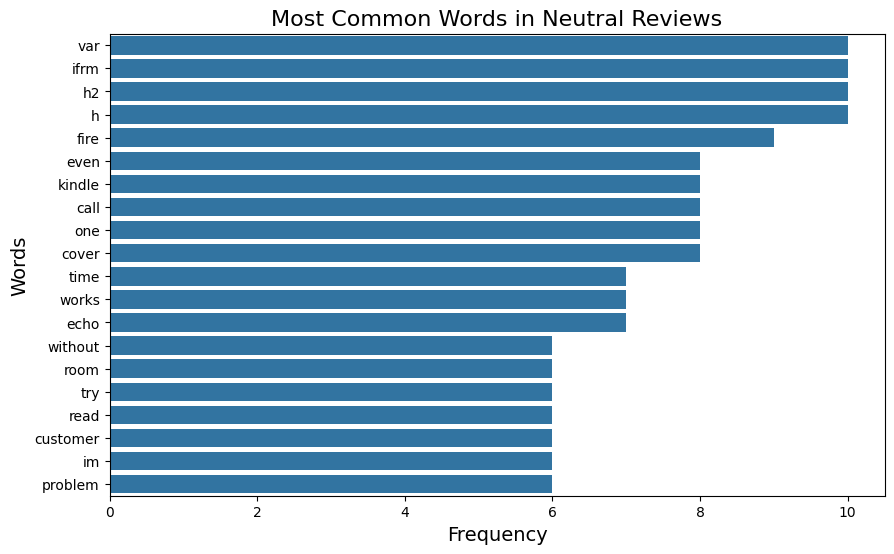

In [71]:
neutral_reviews = df[df['sentiment'] == 'Neutral']['No_Stopwords_Review']
neutral_words_list = [word for review in neutral_reviews for word in review]
neutral_words = Counter(neutral_words_list).most_common(20)
plot_most_common_words(neutral_words, 'Neutral')

## 7. Machine Learning model

#### Feature Engineering 

- Using **TF-IDF (Term Frequency - Inverse Document Frequency)** to convert `Cleaned_Review`  
- After that, use **Label Encoder** to convert `sentiment`


In [72]:
## using columns nessecesary to training model
df_train = df[['Cleaned_Review', 'sentiment']]
df_train.head()

,Cleaned_Review,sentiment
0,i initially had trouble deciding between the p...,Positive
1,allow me to preface this with a little history...,Positive
2,i am enjoying it so far great for reading had ...,Positive
3,i bought one of the first paperwhites and have...,Positive
4,i have to say upfront i dont like coroporate ...,Positive


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

le = LabelEncoder()

X = tfidf_vectorizer.fit_transform(df_train['Cleaned_Review'])
y = le.fit_transform(df_train['sentiment'])


In [74]:
X.shape, y.shape

((1597, 5000), (1597,))

#### Train - test split

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1277, 5000), (1277,))

In [76]:
## Convert TF-IDF sparse matrix to a dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

### Handle imbalance data

In [77]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### Model training

In [78]:
from sklearn.utils.class_weight import compute_sample_weight


sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)


In [82]:
# Predict 
train_pred = xgboost_model.predict(X_train)
test_pred = xgboost_model.predict(X_test)

# Accuracy 
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"XGBoost - Train Accuracy: {train_accuracy:.4f}")
print(f"XGBoost - Test Accuracy: {test_accuracy:.4f}")

print("\nXGBoost - Train classification Report:")
print(classification_report(y_train, train_pred))
print("\nXGBoost - Test classification Report:")
print(classification_report(y_test, test_pred))

XGBoost - Train Accuracy: 0.9992
XGBoost - Test Accuracy: 0.9375

XGBoost - Train classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00      1140

    accuracy                           1.00      1277
   macro avg       0.99      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277


XGBoost - Test classification Report:
              precision    recall  f1-score   support

           0       0.93      0.45      0.61        31
           1       1.00      0.62      0.77         8
           2       0.94      1.00      0.97       281

    accuracy                           0.94       320
   macro avg       0.96      0.69      0.78       320
weighted avg       0.94      0.94      0.93       320



C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\sklearn.py", li

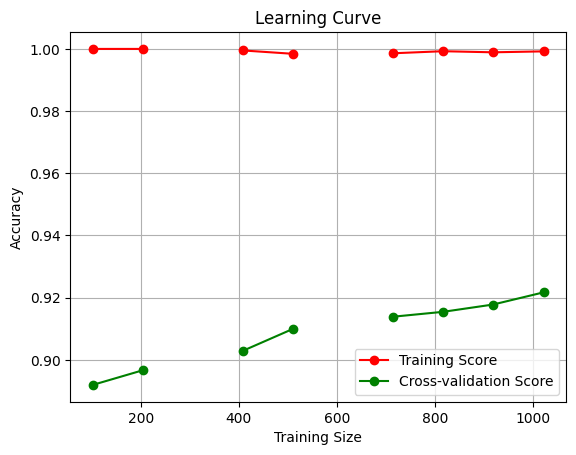

In [83]:
from sklearn.model_selection import learning_curve 

train_sizes, train_scores, test_scores = learning_curve(
    xgboost_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

In this case, the overfitting in training dataset

#### Evaluation metrics 

#### Model Evaluation 

## 8. Topic Modeling